<Figure size 1200x800 with 0 Axes>

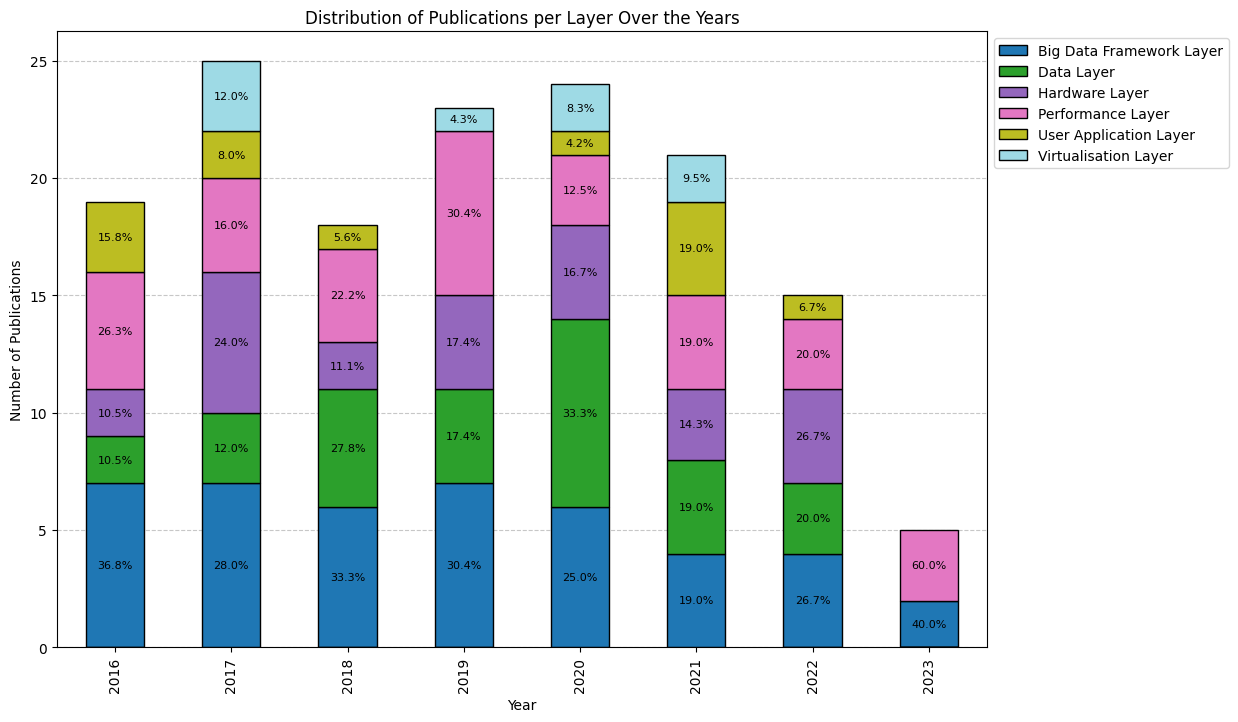

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from data.database import data

# Prepare the data for the stacked column chart
layers_expanded = data['Layers'].str.get_dummies(sep=', ')
publication_years = data[['Year']].join(layers_expanded)

# Group by year and sum the layers
layer_counts_per_year = publication_years.groupby('Year').sum()

# Calculate percentages for annotations
layer_percentages_per_year = layer_counts_per_year.div(layer_counts_per_year.sum(axis=1), axis=0) * 100

# Plot the stacked column chart
plt.figure(figsize=(12, 8))

# Stacked bar plot
ax = layer_counts_per_year.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20', edgecolor='black', zorder=2)

# Annotate the bars with the percentages
for i in range(layer_counts_per_year.shape[0]):
    cumulative_height = 0
    for j, layer in enumerate(layer_counts_per_year.columns):
        count = layer_counts_per_year.iloc[i, j]
        percentage = layer_percentages_per_year.iloc[i, j]
        if count > 0:
            ax.text(i, cumulative_height + count / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=8, color='black')
        cumulative_height += count

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.title('Distribution of Publications per Layer Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
